<a href="https://colab.research.google.com/github/bhaveleena3/Python/blob/main/Random_Forest_Company_assign_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **company dataset**

In [1]:
import pandas as pd
from sklearn import datasets
import matplotlib as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree


In [2]:
df=pd.read_csv('/content/Company_Data.csv')

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df=pd.get_dummies(df,columns=['ShelveLoc','US','Urban'],drop_first=True)

In [5]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,1,0
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


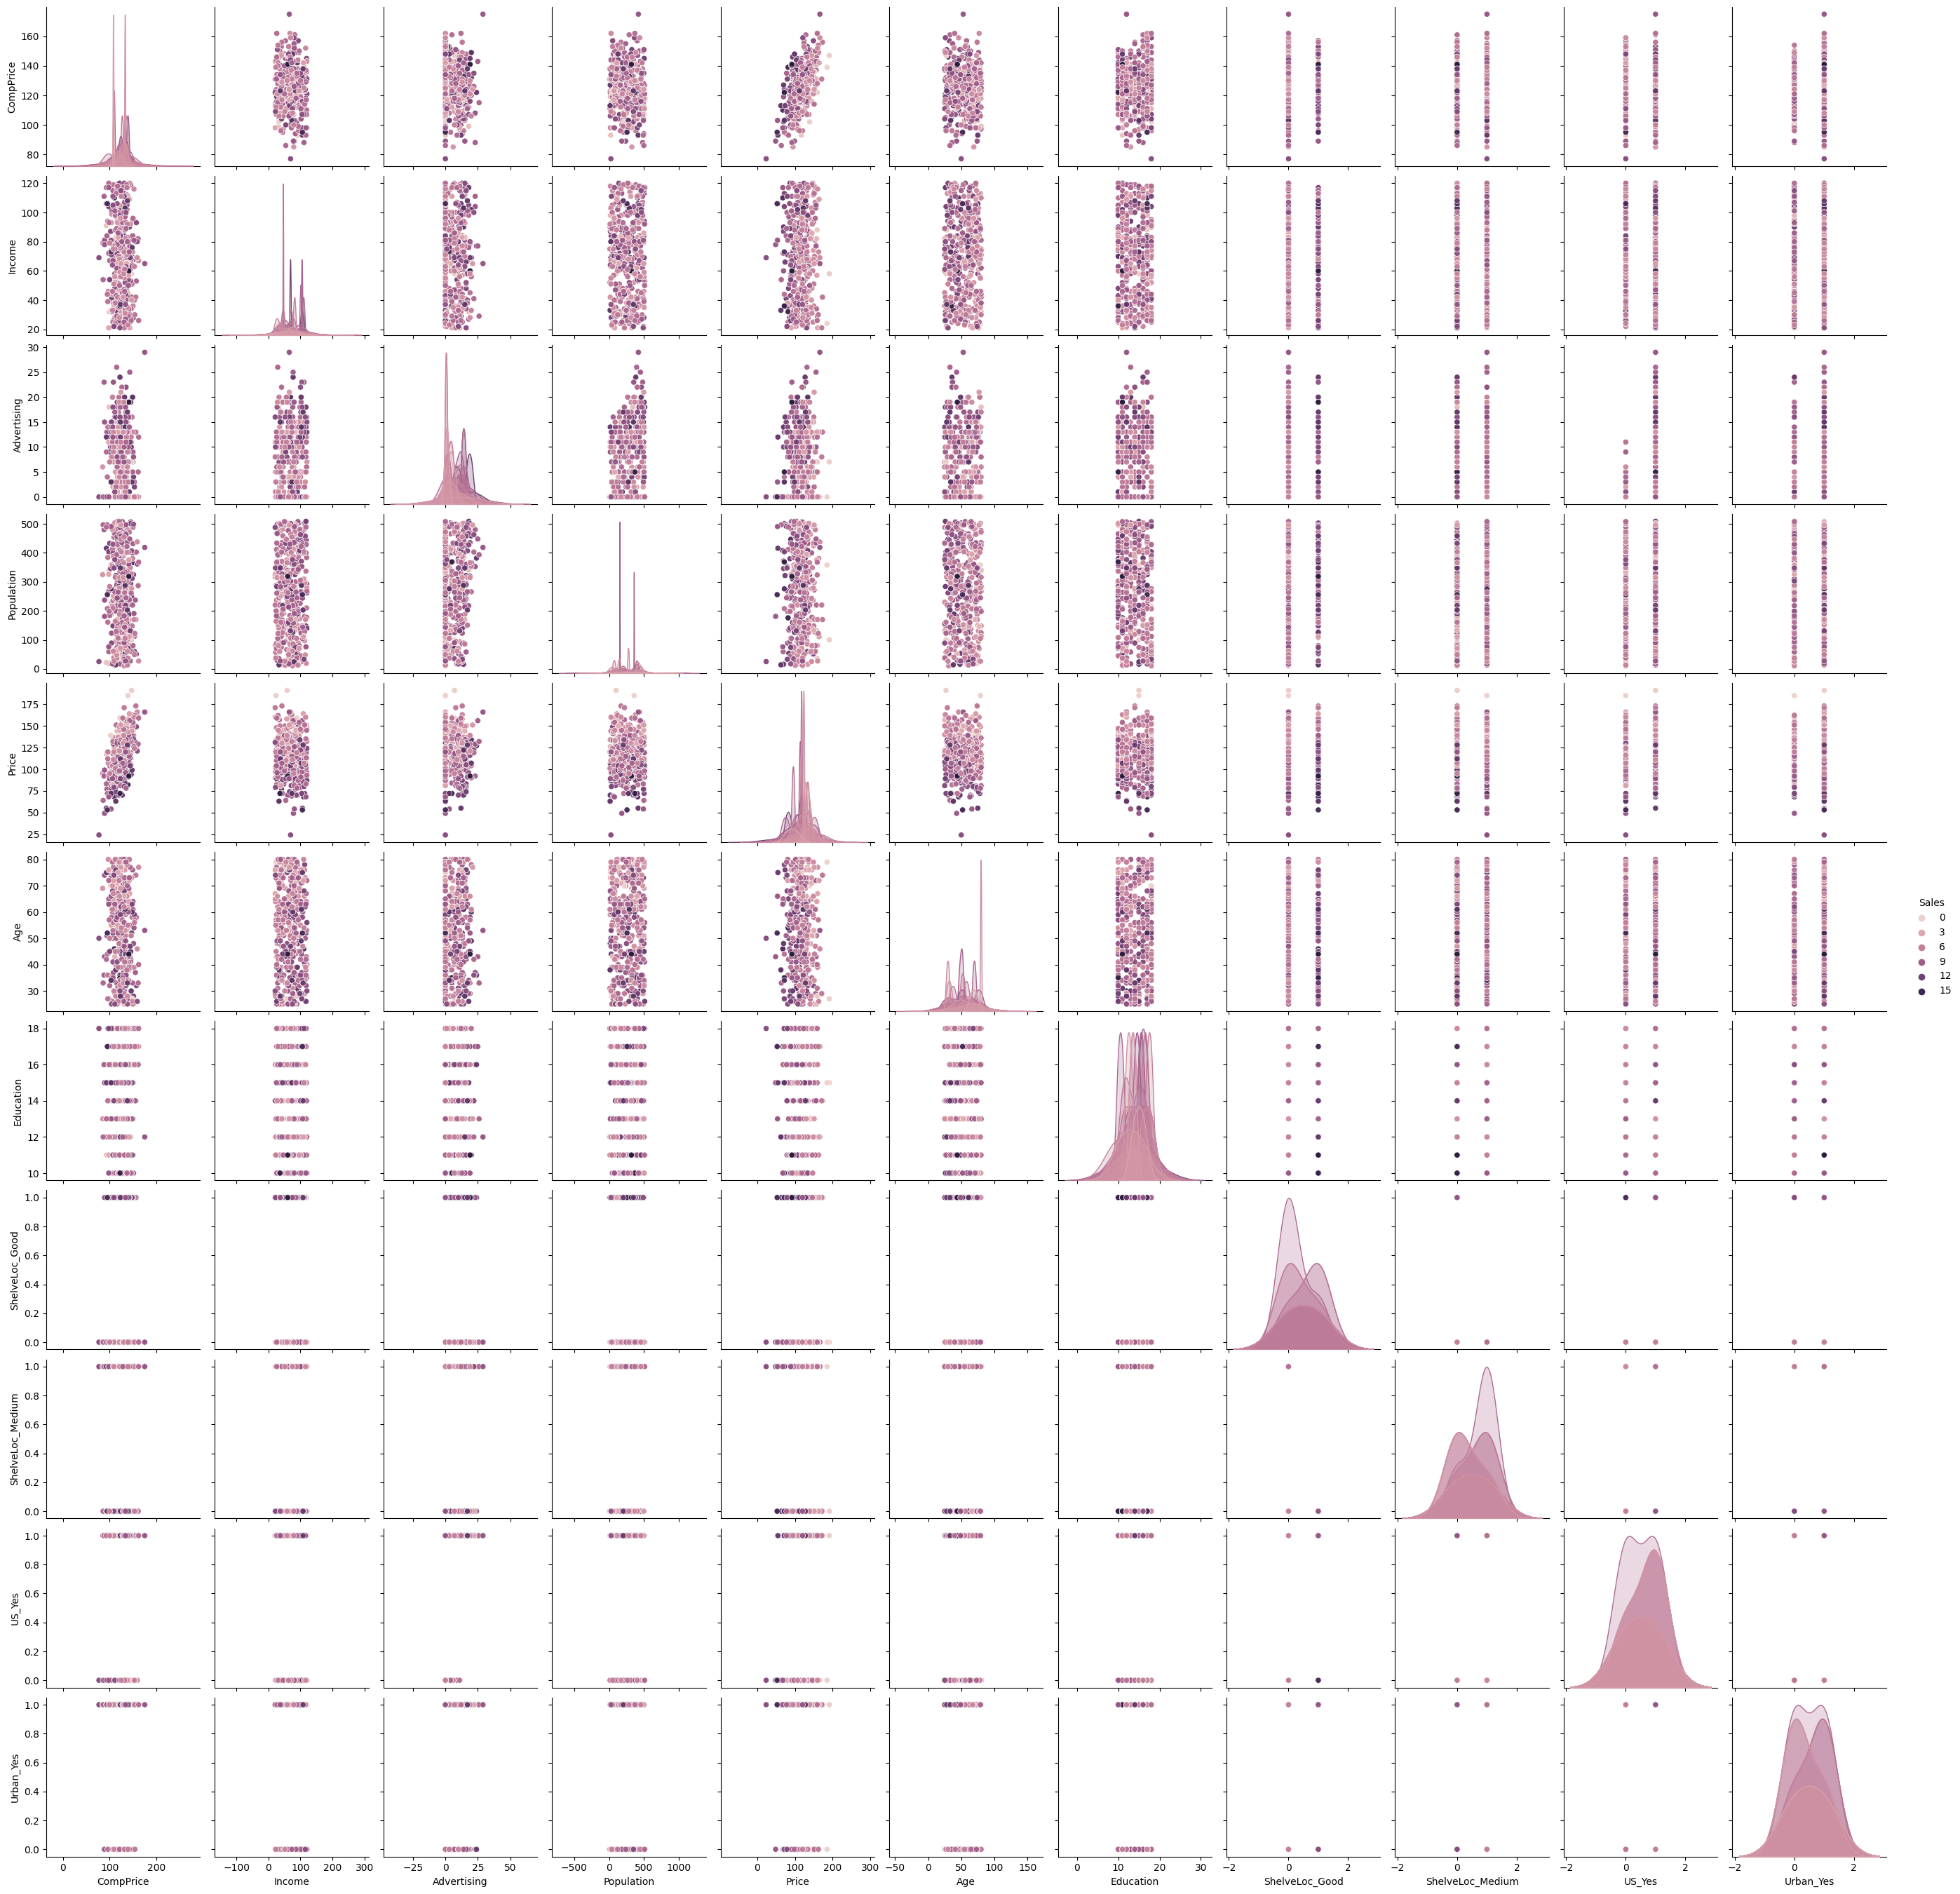

In [6]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'Sales')

In [7]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,:])
df_norm.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
390,0.336202,0.316327,0.545455,0.310345,0.102204,0.520958,0.763636,0.250,0.0,1.0,1.0,1.0
391,0.374923,0.775510,0.424242,0.000000,0.078156,0.598802,0.563636,0.750,0.0,0.0,0.0,1.0
392,0.278427,0.530612,0.212121,0.448276,0.611222,0.634731,0.163636,0.375,0.0,0.0,1.0,1.0
393,0.342348,0.326531,0.303030,0.344828,0.032064,0.574850,0.090909,0.875,0.0,1.0,1.0,0.0
394,0.328826,0.540816,0.373737,0.655172,0.713427,0.688623,0.145455,0.750,0.0,0.0,1.0,1.0
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1.0,0.0,1.0,1.0
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,0.0,1.0,1.0,0.0
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,0.0,1.0,1.0,1.0
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,0.0,0.0,1.0,1.0
399,0.596804,0.581633,0.161616,0.000000,0.034068,0.574850,0.436364,0.750,1.0,0.0,1.0,1.0


In [9]:
# Declaring features & target
x = df_norm.drop(['Sales'], axis=1)
y = df_norm['Sales'].astype('int')

In [10]:
# Splitting data into train & test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [11]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [12]:
    ##Splitting the data into featuers and labels
features = df.iloc[:,1:11]
labels = df.iloc[:,0]

In [13]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[1:12]
target = colnames[0]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2)

In [15]:
#Building Model
from sklearn.ensemble import RandomForestClassifier as RF
model=RF(n_jobs= 15 ,n_estimators = 15,oob_score=True, criterion ='entropy')
model.fit(x_train,y_train.astype('int'))

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=15,
                       oob_score=True)

In [16]:
##Predictions on train data
prediction = model.predict(x_train)

In [17]:
# For accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train.astype('int'),prediction)

In [18]:
accuracy

0.996875

In [19]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train.astype('int'),prediction)

In [20]:
confusion


array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 39,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  

In [21]:
##Prediction on test data
pred_test = model.predict(x_test)
##Accuracy
acc_test =accuracy_score(y_test.astype('int'),pred_test)

In [22]:
acc_test

0.1875

**Building Decision Tree Classifier using Entropy criteria**

In [23]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model1.fit(x_train,y_train.astype('int'))



DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 3.528\nsamples = 320\nvalue = [4, 2, 9, 16, 31, 40, 41, 48, 39, 26, 25, 16\n14, 6, 1, 1, 1]'),
 Text(0.25, 0.625, 'x[4] <= 106.5\nentropy = 3.337\nsamples = 250\nvalue = [4, 2, 9, 15, 30, 40, 34, 39, 32, 18, 15, 6, 5\n1, 0, 0, 0]'),
 Text(0.125, 0.375, 'x[5] <= 49.0\nentropy = 3.178\nsamples = 83\nvalue = [0, 0, 1, 4, 1, 7, 8, 19, 14, 9, 8, 6, 5, 1\n0, 0, 0]'),
 Text(0.0625, 0.125, 'entropy = 2.857\nsamples = 30\nvalue = [0, 0, 0, 0, 0, 0, 3, 6, 4, 5, 2, 4, 5, 1\n0, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 2.971\nsamples = 53\nvalue = [0, 0, 1, 4, 1, 7, 5, 13, 10, 4, 6, 2, 0, 0\n0, 0, 0]'),
 Text(0.375, 0.375, 'x[8] <= 0.5\nentropy = 3.124\nsamples = 167\nvalue = [4, 2, 8, 11, 29, 33, 26, 20, 18, 9, 7, 0, 0\n0, 0, 0, 0]'),
 Text(0.3125, 0.125, 'entropy = 2.775\nsamples = 50\nvalue = [2, 2, 5, 6, 14, 12, 4, 4, 0, 0, 1, 0, 0, 0\n0, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 3.021\nsamples = 117\nvalue = [2, 0, 3, 5, 15, 21, 22, 16, 18, 9, 6, 0, 0\n

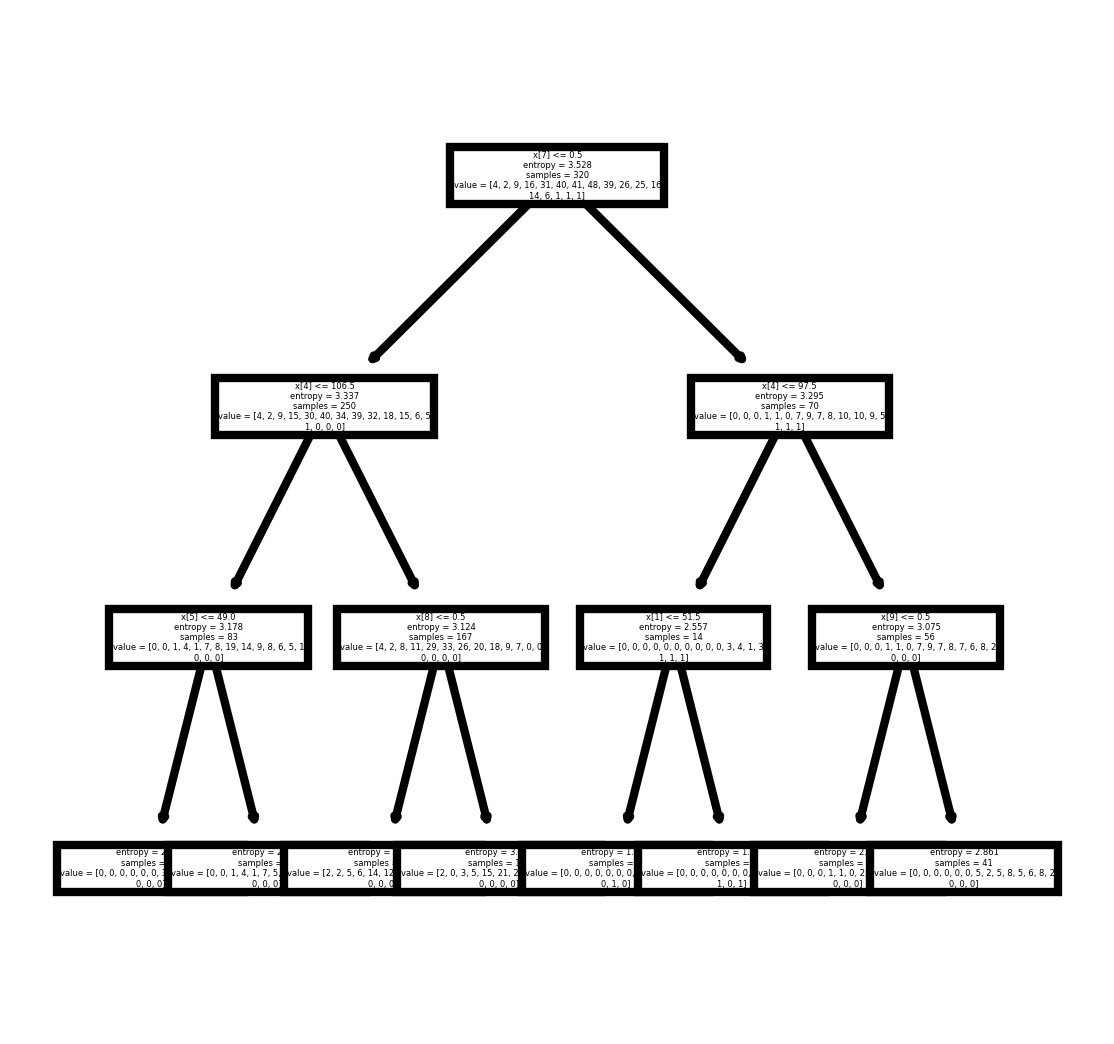

In [25]:
#plot decisionn Tree
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=600)
tree.plot_tree(model1)

In [26]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'US_Yes',
 'Urban_Yes']

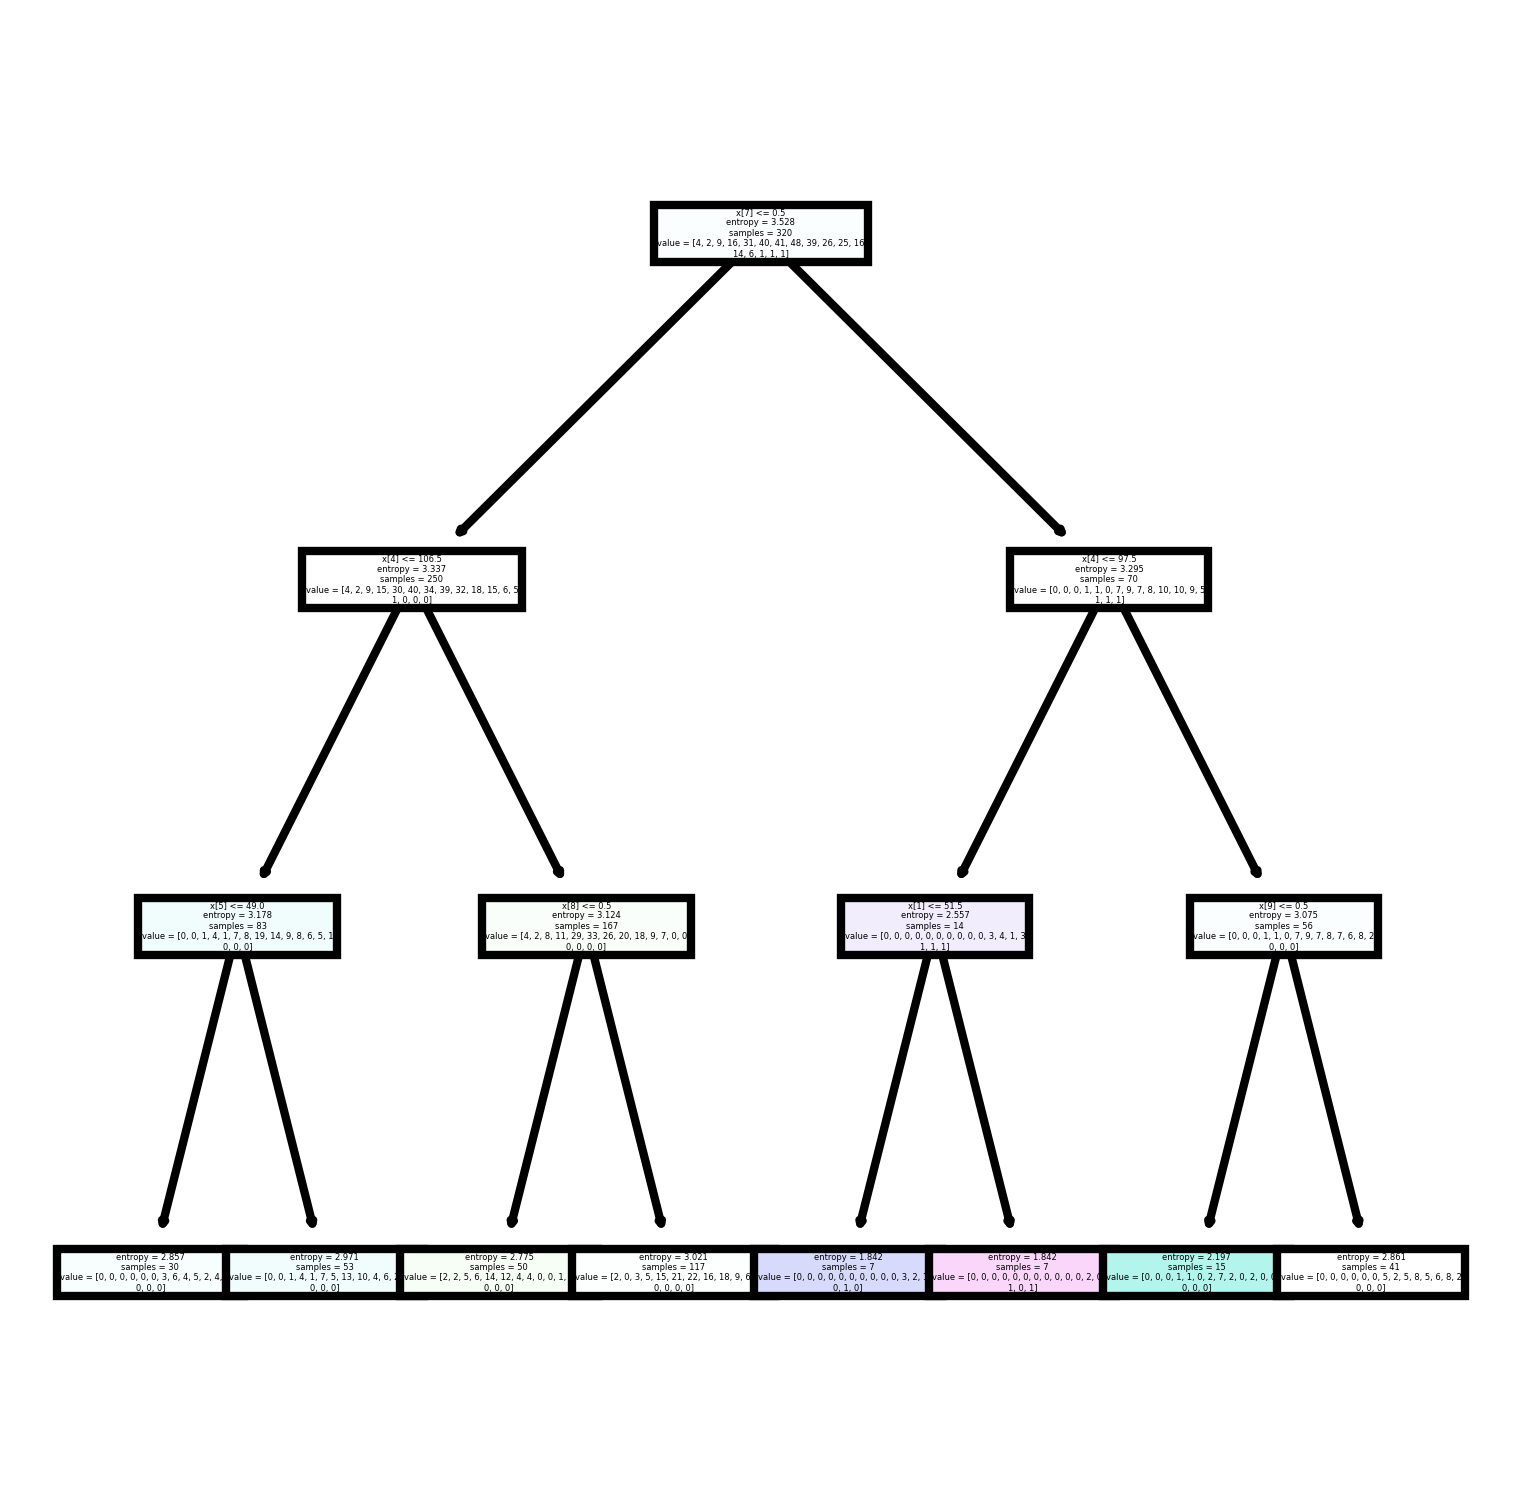

In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=600)
tree.plot_tree(model1,filled = True);

In [28]:
#Predicting on test data
preds = model1.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

7     31
6     27
4     10
9      8
13     2
10     2
dtype: int64

In [29]:
preds

array([ 7,  7, 13,  6,  7,  6,  7,  7,  6,  4,  6,  9,  7,  7,  7,  6,  7,
        6,  7,  6,  7,  7,  7,  7, 10,  6,  9,  6, 10,  6,  7,  7,  6,  6,
        7,  6, 13,  7,  9,  7,  6,  6,  7,  7,  7,  4,  6,  6,  9,  7,  9,
        6,  4,  6,  4,  4,  9,  7,  6,  7,  7,  7,  7,  6,  7,  4,  6,  4,
        7,  6,  4,  4,  6,  6,  6,  6,  9,  7,  9,  4])

In [30]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,4,6,7,9,10,13
Sales,,,,,,
0.91,1,0,0,0,0,0
2.34,1,0,0,0,0,0
3.24,1,0,0,0,0,0
3.45,0,1,0,0,0,0
3.91,0,0,1,0,0,0
...,...,...,...,...,...,...
11.93,0,0,0,1,0,0
12.49,0,0,1,0,0,0
12.85,0,0,0,1,0,0


In [31]:
# Accuracy
np.mean(preds==y_test)

0.0

**Building decision tree classifier using Gini criteria**

In [32]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [33]:
model_gini.fit(x_train,y_train.astype('int'))#fitting model

DecisionTreeClassifier(max_depth=3)

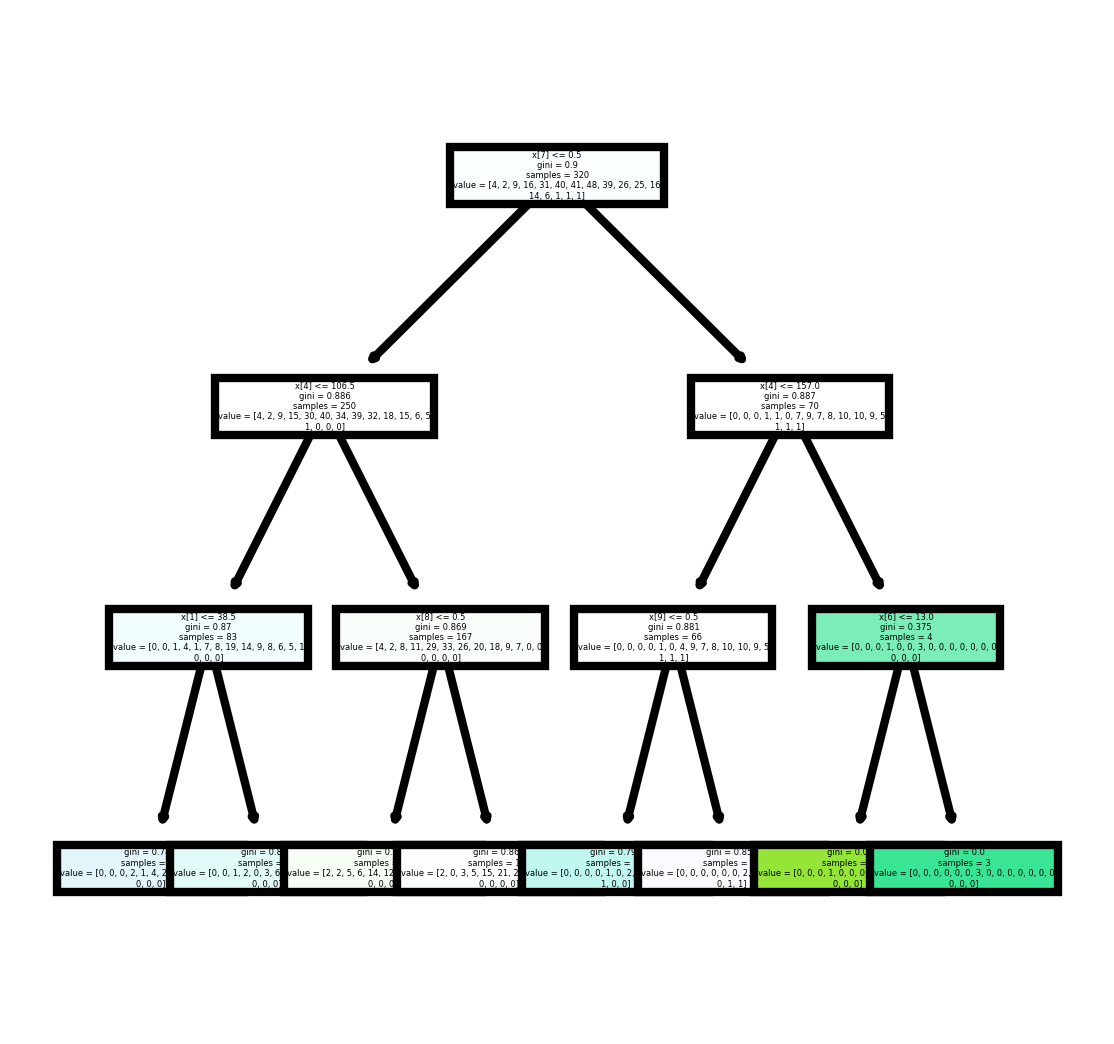

In [34]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Good','ShelveLoc_Medium','US_Yes', 'Urban_Yes']
cn=['Sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=600)
tree.plot_tree(model_gini,filled = True);

In [35]:
#Predicting on test data
predicts = model1.predict(x_test) # predicting on test data set
pd.Series(predicts).value_counts() # getting the count of each category

7     31
6     27
4     10
9      8
13     2
10     2
dtype: int64

In [36]:
predicts


array([ 7,  7, 13,  6,  7,  6,  7,  7,  6,  4,  6,  9,  7,  7,  7,  6,  7,
        6,  7,  6,  7,  7,  7,  7, 10,  6,  9,  6, 10,  6,  7,  7,  6,  6,
        7,  6, 13,  7,  9,  7,  6,  6,  7,  7,  7,  4,  6,  6,  9,  7,  9,
        6,  4,  6,  4,  4,  9,  7,  6,  7,  7,  7,  7,  6,  7,  4,  6,  4,
        7,  6,  4,  4,  6,  6,  6,  6,  9,  7,  9,  4])

In [37]:
pd.crosstab(predicts,y_test.astype('int'))

Sales,0,2,3,4,5,6,7,8,9,10,11,12,13,14
row_0,,,,,,,,,,,,,,
4,1,1,1,2,2,1,0,1,1,0,0,0,0,0
6,0,0,1,6,6,8,1,4,1,0,0,0,0,0
7,0,0,1,2,5,4,3,5,5,4,1,1,0,0
9,0,0,0,0,0,0,0,1,2,1,2,1,1,0
10,0,0,0,0,0,0,0,0,0,0,1,0,0,1
13,0,0,0,0,0,0,0,0,0,0,2,0,0,0


In [38]:
accuracy_score(predicts,y_test.astype('int'))

0.1875